#PRVI ČAS

Prvo nešto kratko o MonteKarlo metodi. 
Ideja je da se generišu neki slučajni brojevi, na određeni način ispitaju neophodni uslovi (tj. faktički gledamo koliko često se nešto "realizovalo") i vratimo taj broj. 

Ta metoda specijalno dobro prolazi u slučaju integracije i pogodna je ako imamo neke nezgodne podintegralne funkcije, koje je teško ili nemoguće izraziti u elementarnim funkcijama. U slučaju da se integracija ne vrši na skupu [0,1] već na nekom drugom, 
moramo da pazimo kako biramo granice za generisanje pseudoslučajnih brojeva. Promenljiva "x" se svakako kreće po granicama integracije, dok "y" od "min f(x)" do "max f(x)" po skupu svih mogućih vrednosti za "x". 
Zato je neophodan uslov da podintegralna funkcija f(x) bude ograničena na datom skupu.

Pokazaćemo na primeru nekih prostih funkcija.

Želimo da odredimo površinu ispod neke određene funkcije na intervalu [0, 1] pomoću Monte Karlo metode.

In [34]:
import numpy as np
from numpy import random
#from statistics import mean
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas
import csv

In [27]:
def Montekarlo(N,s): # s - stepen funkcije, pozitivan broj
    brojac=[]
    for i in range(N):
        x=random.rand()
        y=random.rand()
        if y<x**s:
            brojac.append(1)
        else: brojac.append(0)
    return(mean(brojac))

Montekarlo(10000, 5)

0.1705

Druga verzija iste funkcije:

In [41]:
def Montekarlo2(n,s):
    x=np.array([random.rand() for i in range(n)])
    y=np.array([random.rand() for i in range(n)])
    z=list(map(int,y<x**s)) # da li može jednostavnije?
    return(mean(z))

Montekarlo2(10000, 5)

0.1648

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[[ 41.31826206]]
[-73.35646552]


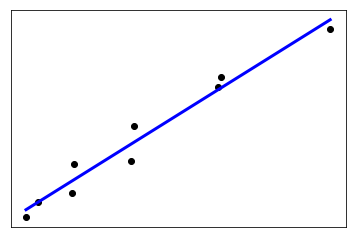

R^2 je:  0.964225379866


In [42]:
# sklearn je paket za mašinsko učenje u pythonu...
# valjalo bi odvojiti train, test i cv podatke!

x=np.array([8.3, 9.3, 12.1, 12.3, 17.0, 17.3, 24.3, 24.5, 33.6])
x=x.reshape(-1, 1)
y=np.array([227, 312, 362, 521, 539, 728, 945, 1000, 1263])
y=y.reshape(-1, 1)

# Oceniti koeficijente modela y=a*x+b, gde su x, y - vektori, dok a i b - neki brojevi. 
regr = linear_model.LinearRegression() #objekat linearne regresije
fitted=regr.fit(x, y) # x mora biti kolona ovde, a inače je matrica 
coeff=regr.coef_ # ne vraća beta_0
intercept=regr.intercept_
print(coeff) # 41.31826206
print(intercept) # -73.35646552
plt.scatter(x, y,  color='black') # ovo i ovo ispod su trebali da budu na test skupu...
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

R_squared=fitted.score(x, y)
print("R^2 je: ",R_squared)

Možda uraditi verziju i u StatsModels paketu?
http://statsmodels.sourceforge.net/

Drugi primer:

[[ 25.32646778]]
[ 353.1648795]


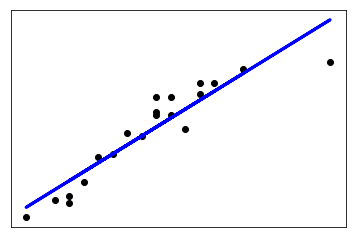

R^2 je:  0.871619258229


In [43]:
x=np.array([4,9, 10, 14, 4, 7, 12, 22, 1, 3, 8, 11, 5, 6, 10, 11, 16, 13, 13, 10])
x=x.reshape(-1, 1)
y=np.array([390, 580, 650, 730, 410, 530, 600, 790, 350, 400, 590, 640,450, 520, 690, 690, 770,700, 730, 640])
y=y.reshape(-1, 1)
#lin reg
regr = linear_model.LinearRegression() #objekat linearne regresije
fitted=regr.fit(x, y) # x mora biti kolona ovde, a inače je matrica 
coeff=regr.coef_ # ne vraća beta_0
intercept=regr.intercept_
print(coeff) # 25.32646778
print(intercept) # 353.1648795
# ima i atribut residues_ koji vraća sumu reziduala
plt.scatter(x, y,  color='black') # ovo i ovo ispod su trebali da budu na test skupu...
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

R_squared=fitted.score(x, y)
print("R^2 je: ",R_squared)

Treći primer:

[[-0.0566588]]
[ 353.1648795]


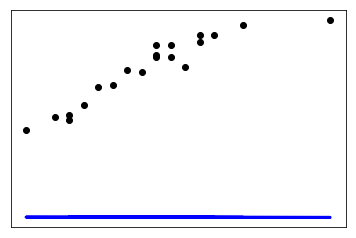

R^2 je:  -20.2760436658


In [44]:
q=np.arange(-1,1,0.05)
w=q**2+[random.normal(0, 0.05) for i in range(len(q))]
w=np.array(w)
q=q.reshape(-1, 1)
w=w.reshape(-1, 1)
# naci regresionu pravu za w u odnosu na q
regr = linear_model.LinearRegression() #objekat linearne regresije
fitted=regr.fit(q, w)
coeff=regr.coef_
print(coeff)
print(intercept) # 353.1648795
# ima i atribut residues_ koji vraća sumu reziduala
plt.scatter(x, y,  color='black') # ovo i ovo ispod su trebali da budu na test skupu...
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

R_squared=fitted.score(x, y)
print("R^2 je: ",R_squared)

Četvrti primer

In [45]:
with open('Boston.csv', 'rb') as csvfile:
        tabela = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in tabela: pass
            
# nešto me zeza ovo učitavanje...

Error: iterator should return strings, not bytes (did you open the file in text mode?)